In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
datos = np.genfromtxt('ejemplo-s10.txt')
x = datos[:,0]
y = datos[:,1]

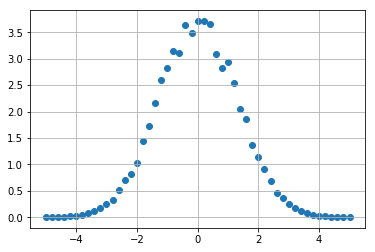

In [3]:
plt.scatter(x,y)
plt.grid(True)

\begin{equation}
y = y_0 e^{-\alpha x^2}
\end{equation}
\begin{equation}
\ln{y} = \ln{y_0 -\alpha x^2}
\end{equation}
Si definimos $z = \ln {y} $ Entonces
\begin{equation}
z = z_0 -\alpha x^2
\end{equation}
Donde $z_0 = \ln{y_0}$
\begin{equation}
z = z_0 -\alpha w
\end{equation}

Text(0,0.5,'$z$')

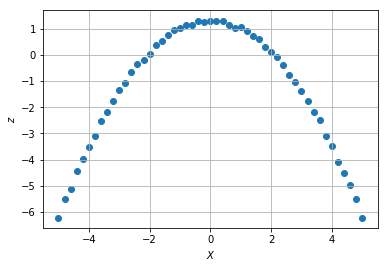

In [4]:
z = np.log(y)
plt.scatter(x,z)
plt.grid(True)
plt.xlabel('$X$')
plt.ylabel('$z$')

In [9]:
malpha, _,z0 = np.polyfit(x,z,2)
#acompaña a x^2, el de x y el libre
alpha = -malpha
print('alpha=', alpha)
print('z0 = ', z0)
y0 = np.exp(z0)
print('y0 = ', y0)

alpha= 0.300005298891
z0 =  1.31558161519
y0 =  3.72691798713


Text(0,0.5,'$y$')

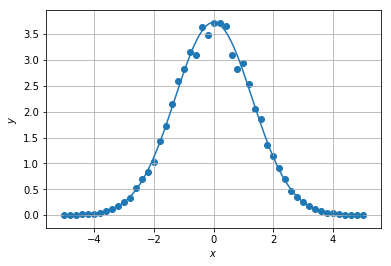

In [10]:
xx = np.linspace(np.min(x),np.max(x),1000)
plt.plot(xx, y0*np.exp(-alpha*xx**2))
plt.scatter(x,y)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')

Text(0,0.5,'$z$')

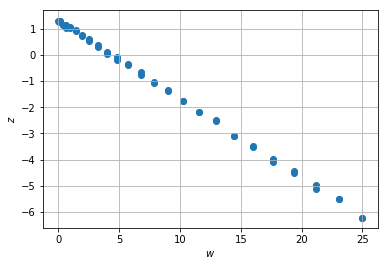

In [11]:
w = x**2
plt.scatter(w,z)
plt.grid(True)
plt.xlabel('$w$')
plt.ylabel('$z$')

In [12]:
np.polyfit(w,z,1)

array([-0.3000053 ,  1.31558162])

In [4]:
datos = np.genfromtxt('ej-ajuste-03.txt')
x = datos[:,0]
y = datos[:,1]

Text(0,0.5,'$y$')

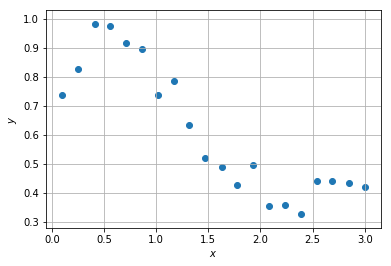

In [14]:
plt.scatter(x,y)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')

En este caso, ajustaremos la siguiente función(modelo) a los datos:
\begin{equation}
f(x) = a + e^{-bx} \sin{cx}
\end{equation}
donde $a,b$ y $c$ son los parámetros a ajustar usando el método de mínimos cuadrados

In [5]:
def f(x,a,b,c):
    return a+np.exp(-b*x)*np.sin(c*x)

In [6]:
xx = np.linspace(0,3.5,100)
def p(a=1,b=1,c=1):
    plt.scatter(x,y)
    plt.plot(xx,f(xx,a,b,c), color ='red')
    plt.xlim(0,3.5)
    plt.ylim(0,1.2)
    plt.grid(True)
    chi2 = np.sum((y - f(x,a,b,c))**2)
    print(chi2)

6.73727042943


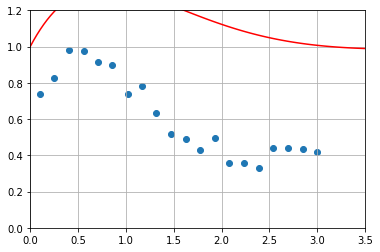

In [7]:
p()

42.3388320482


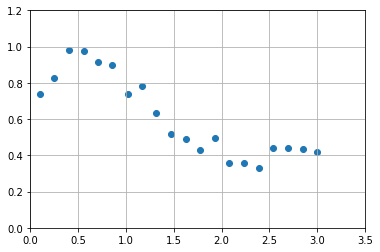

In [8]:
p(2,3,4)

6.90733034281


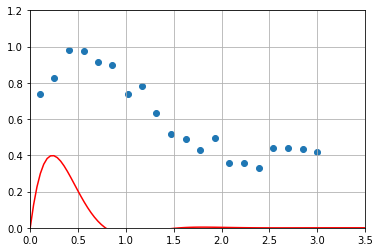

In [9]:
p(0,3,4)

<function __main__.p>

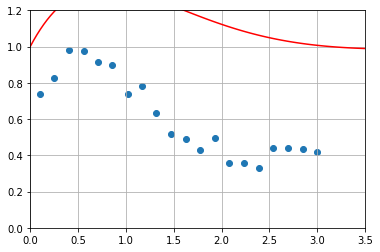

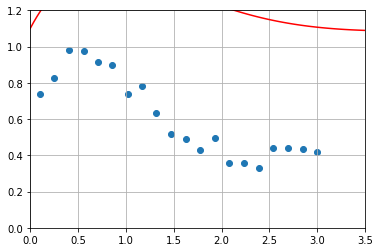

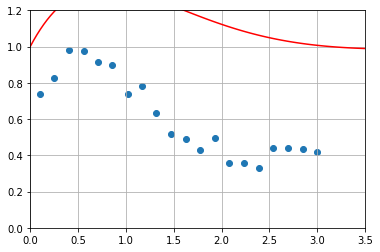

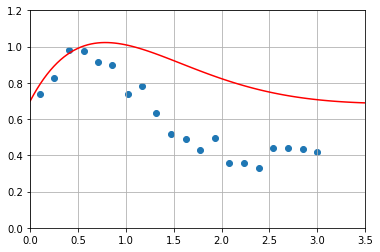

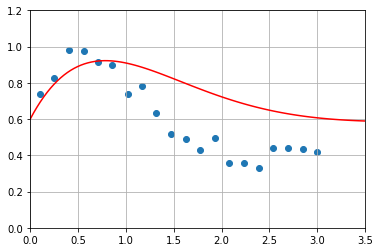

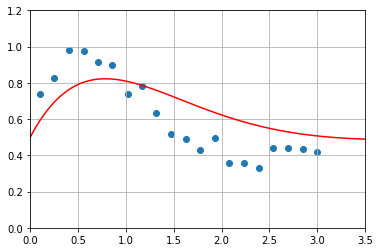

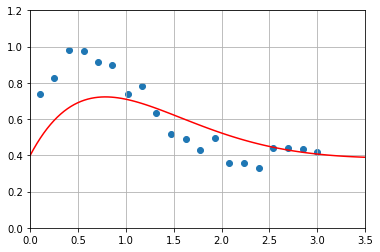

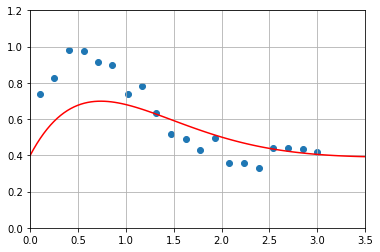

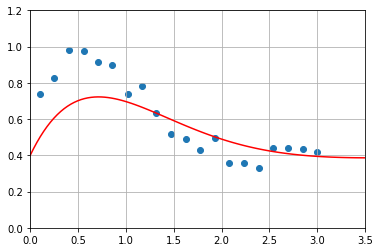

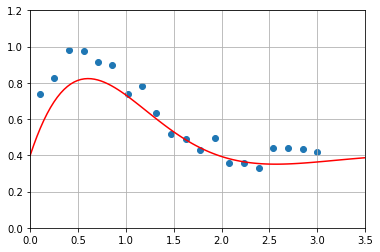

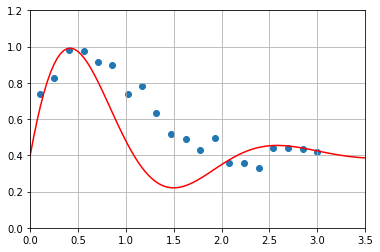

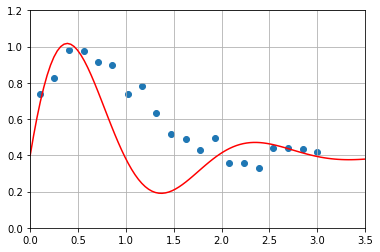

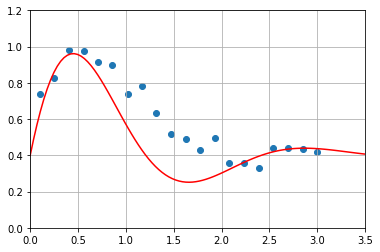

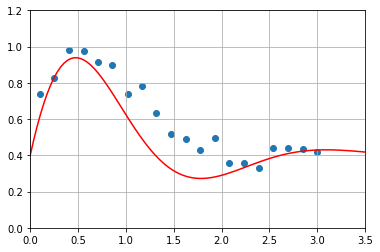

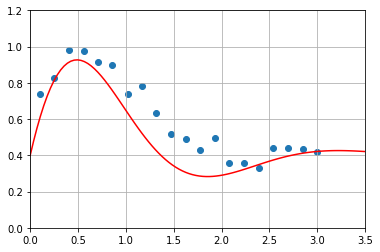

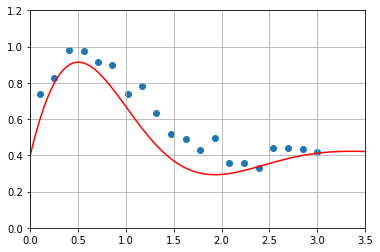

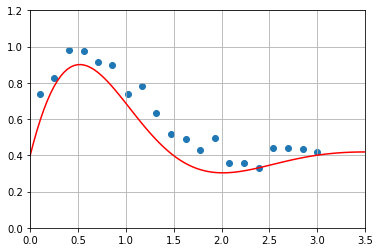

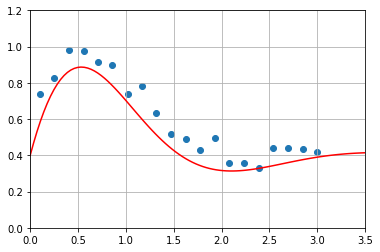

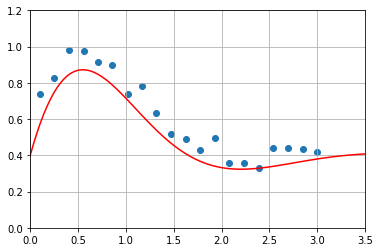

In [10]:
from ipywidgets import interact
interact(p,a=(0,5,0.1), b=(0,5,0.1), c=(0,5,0.1))

In [13]:
from scipy.optimize import curve_fit
#Usa minimos cuadrados, no lineal, para ajustar una funcion f a los datos

In [14]:
curve_fit(f,x,y)

(array([ 0.48091595,  1.02623345,  1.91603506]),
 array([[ 0.00012929,  0.00013082,  0.00021544],
        [ 0.00013082,  0.00289539,  0.00015891],
        [ 0.00021544,  0.00015891,  0.00393408]]))

In [16]:
ao ,bo ,co = curve_fit(f,x,y)[0]

0.0381927517371


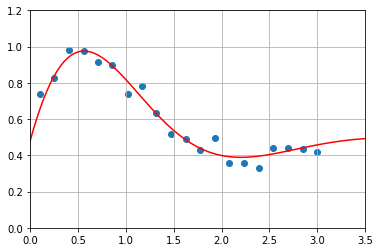

In [17]:

p(ao,bo,co)

Alternativamente puede usarse la función leastsq de scipy.optimize, que es más poderosa y flexible, pero tiene una sintexis algo menos amigable:

In [18]:
from scipy.optimize import leastsq

In [19]:
def res(p,x,y):
    return y-(p[0] + np.exp(-p[1]*x)*np.sin(p[2]*x))

In [20]:
p_ini = [0.5,1,2]

In [21]:
leastsq(res,p_ini,args=(x,y))

(array([ 0.48091602,  1.02623426,  1.91603568]), 1)

In [22]:
leastsq(res,p_ini,args=(x,y))[0]

array([ 0.48091602,  1.02623426,  1.91603568])

In [23]:
curve_fit(f,x,y)[0]

array([ 0.48091595,  1.02623345,  1.91603506])